### 6.1.2 확률적 경사 하강법(SGD)

- 기울어진 방향으로 일정거리만 가겠다는 단순한 방법

In [1]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
    
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr*grads[key]

### 6.1.4 모멘텀
- 공이 그릇 바닥을 구르는 듯한 움직임

In [2]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr=lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v={}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

### 6.1.5 AdaGrad
- 매개변수의 원소마다 적응적으로 갱신 정도를 조정
- 매개변수의 원소 중에서 많이 움직이는(크게 갱신됭) 원소는 학습률이 낮아진다.
- 학습률 감소가 매개변수의 원소마다 다르게 적용됨

In [4]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
    
    def update(self, params, grads):
        if self.h is None:
            self.h={}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.h[key] += grads[key]*grads[key]
            params[key] -= self.lr*grads[key] / (np.sqrt(self.h[key]) + 1e-7)

===========iteration:0===========
SGD:2.2543655006878094
Momentum:2.2866404261855036
AdaGrad:2.2698256987854575
Adam:2.1471574563766533
===========iteration:100===========
SGD:1.5294501297729115
Momentum:0.3754342351497516
AdaGrad:0.14772506411216738
Adam:0.25912437282247947
===========iteration:200===========
SGD:0.679707323847168
Momentum:0.1751219730311141
AdaGrad:0.08432723902631398
Adam:0.11834846164320634
===========iteration:300===========
SGD:0.492670339232834
Momentum:0.19962712716584918
AdaGrad:0.08243111931393245
Adam:0.1670259432250875
===========iteration:400===========
SGD:0.4675943197637943
Momentum:0.18924244730630313
AdaGrad:0.11199556835188823
Adam:0.1344965389137053
===========iteration:500===========
SGD:0.40512723284656427
Momentum:0.2300614908981064
AdaGrad:0.14049802328998034
Adam:0.18370093024013975
===========iteration:600===========
SGD:0.37501681757597943
Momentum:0.15117956674471722
AdaGrad:0.04788870998825622
Adam:0.10547970072651297
===========iteration:70

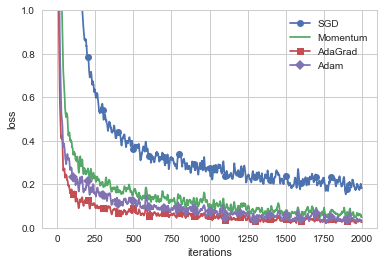

In [6]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    

for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

## 6.2 가중치의 초기값

### 6.2.2 은닉층의 활성화값 분포

In [7]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

#### 가중치를 표준편차가 1인 정규분포로 초기화할 때의 각 층의 활성화값 분포

In [26]:
x=np.random.randn(1000,100)
node_num=100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i!=0:
        x=activations[i-1]
    w = np.random.randn(node_num, node_num)*1
    a = np.dot(x,w)
    z = sigmoid(a)
    activations[i] = z

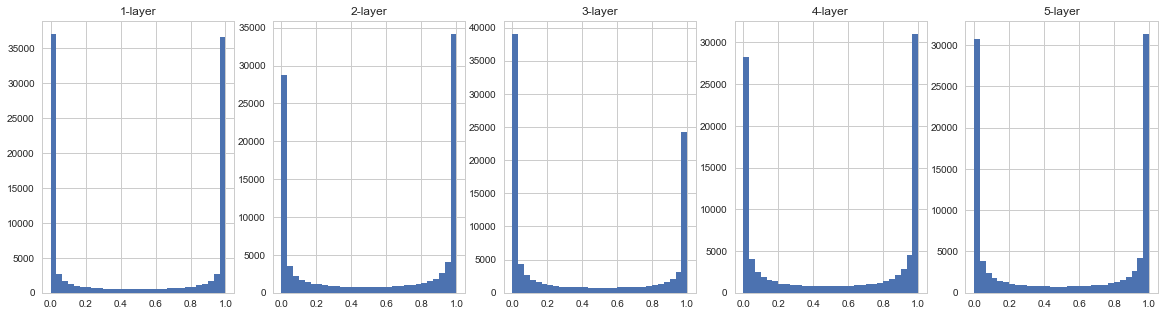

In [27]:
plt.figure(figsize=(20,5)) 
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1)+'-layer')
    plt.hist(a.flatten(),30,range=(0,1))
plt.show()

#### 가중치를 표준편차가 0.01인 정규분포로 초기화할 때의 각 층의 활성화값 분포

In [28]:
x=np.random.randn(1000,100)
node_num=100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i!=0:
        x=activations[i-1]
#     w = np.random.randn(node_num, node_num)*1
    w = np.random.randn(node_num, node_num)*0.01
    a = np.dot(x,w)
    z = sigmoid(a)
    activations[i] = z

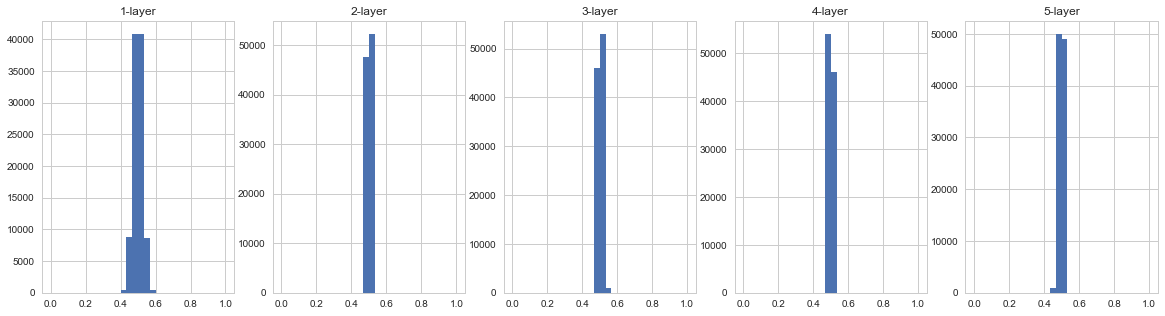

In [29]:
plt.figure(figsize=(20,5)) 
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1)+'-layer')
    plt.hist(a.flatten(),30,range=(0,1))
plt.show()

#### 가중치의 초기값으로 'Xavier'(사비에르) 초기값을 이용할 때의 각 층의 활성화값 분포

In [32]:
x=np.random.randn(1000,100)
node_num=100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i!=0:
        x=activations[i-1]
#     w = np.random.randn(node_num, node_num)*1
#     w = np.random.randn(node_num, node_num)*0.01
    w = np.random.randn(node_num,node_num)/np.sqrt(node_num)
    a = np.dot(x,w)
    z = sigmoid(a)
    activations[i] = z

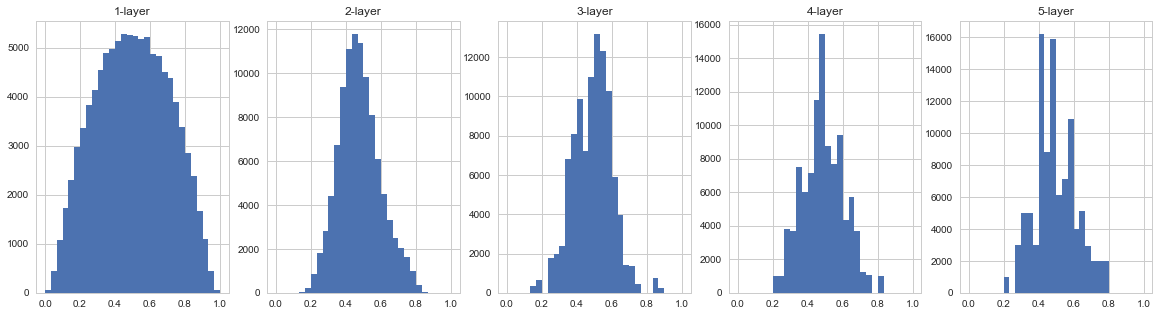

In [33]:
plt.figure(figsize=(20,5)) 
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1)+'-layer')
    plt.hist(a.flatten(),30,range=(0,1))
plt.show()

===========iteration:0===========
std=0.01:2.3025552426456204
Xavier:2.2927413670687287
He:2.386226314484303
===========iteration:100===========
std=0.01:2.3018630542459158
Xavier:2.2023060749296595
He:1.4028951833441792
===========iteration:200===========
std=0.01:2.3022915306157943
Xavier:2.0532237826868323
He:0.7248883822484041
===========iteration:300===========
std=0.01:2.3019460786873953
Xavier:1.6642678496693655
He:0.6435237335949542
===========iteration:400===========
std=0.01:2.303638864725489
Xavier:1.1333934427598877
He:0.4027166537867938
===========iteration:500===========
std=0.01:2.300800038017824
Xavier:0.7738105614728241
He:0.40170911286050404
===========iteration:600===========
std=0.01:2.3050999242591903
Xavier:0.7232651196205362
He:0.45454838767732375
===========iteration:700===========
std=0.01:2.298261277405718
Xavier:0.5228880122004576
He:0.29267623711975055
===========iteration:800===========
std=0.01:2.3020681420808087
Xavier:0.327869841494119
He:0.1430219475022

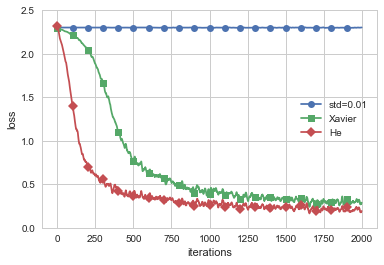

In [34]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

============== 1/16 ==============
epoch:0 | 0.099 - 0.147
epoch:1 | 0.1 - 0.137


../common/multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
../common/multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:2 | 0.1 - 0.124
epoch:3 | 0.1 - 0.132
epoch:4 | 0.117 - 0.145
epoch:5 | 0.117 - 0.171
epoch:6 | 0.117 - 0.19
epoch:7 | 0.117 - 0.21
epoch:8 | 0.117 - 0.223
epoch:9 | 0.117 - 0.242
epoch:10 | 0.117 - 0.263
epoch:11 | 0.117 - 0.275
epoch:12 | 0.117 - 0.286
epoch:13 | 0.117 - 0.311
epoch:14 | 0.117 - 0.318
epoch:15 | 0.117 - 0.34
epoch:16 | 0.117 - 0.36
epoch:17 | 0.117 - 0.352


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.356
epoch:19 | 0.117 - 0.377
============== 2/16 ==============
epoch:0 | 0.087 - 0.094


../common/functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)
../common/layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


epoch:1 | 0.097 - 0.112
epoch:2 | 0.097 - 0.152
epoch:3 | 0.097 - 0.177
epoch:4 | 0.097 - 0.207
epoch:5 | 0.097 - 0.239
epoch:6 | 0.097 - 0.267
epoch:7 | 0.097 - 0.298
epoch:8 | 0.097 - 0.326
epoch:9 | 0.097 - 0.346
epoch:10 | 0.097 - 0.385
epoch:11 | 0.097 - 0.407
epoch:12 | 0.097 - 0.416
epoch:13 | 0.097 - 0.43
epoch:14 | 0.097 - 0.45
epoch:15 | 0.097 - 0.47
epoch:16 | 0.097 - 0.491
epoch:17 | 0.097 - 0.51
epoch:18 | 0.097 - 0.513
epoch:19 | 0.097 - 0.529


No handles with labels found to put in legend.


============== 3/16 ==============
epoch:0 | 0.116 - 0.107
epoch:1 | 0.294 - 0.109
epoch:2 | 0.442 - 0.161
epoch:3 | 0.538 - 0.206
epoch:4 | 0.621 - 0.248
epoch:5 | 0.668 - 0.278
epoch:6 | 0.717 - 0.332
epoch:7 | 0.771 - 0.365
epoch:8 | 0.809 - 0.398
epoch:9 | 0.824 - 0.427
epoch:10 | 0.849 - 0.462
epoch:11 | 0.873 - 0.489
epoch:12 | 0.894 - 0.517
epoch:13 | 0.907 - 0.541
epoch:14 | 0.921 - 0.568
epoch:15 | 0.938 - 0.577
epoch:16 | 0.947 - 0.603
epoch:17 | 0.955 - 0.626
epoch:18 | 0.965 - 0.64


No handles with labels found to put in legend.


epoch:19 | 0.973 - 0.654
============== 4/16 ==============
epoch:0 | 0.12 - 0.079
epoch:1 | 0.282 - 0.117
epoch:2 | 0.426 - 0.207
epoch:3 | 0.503 - 0.3
epoch:4 | 0.596 - 0.371
epoch:5 | 0.675 - 0.423
epoch:6 | 0.704 - 0.48
epoch:7 | 0.717 - 0.527
epoch:8 | 0.753 - 0.568
epoch:9 | 0.768 - 0.599
epoch:10 | 0.786 - 0.619
epoch:11 | 0.806 - 0.645
epoch:12 | 0.819 - 0.661
epoch:13 | 0.825 - 0.676
epoch:14 | 0.832 - 0.693
epoch:15 | 0.848 - 0.716
epoch:16 | 0.862 - 0.727
epoch:17 | 0.863 - 0.739
epoch:18 | 0.874 - 0.753
epoch:19 | 0.873 - 0.764


No handles with labels found to put in legend.


============== 5/16 ==============
epoch:0 | 0.138 - 0.123
epoch:1 | 0.154 - 0.163
epoch:2 | 0.169 - 0.3
epoch:3 | 0.181 - 0.431
epoch:4 | 0.193 - 0.519
epoch:5 | 0.214 - 0.583
epoch:6 | 0.22 - 0.633
epoch:7 | 0.228 - 0.671
epoch:8 | 0.234 - 0.694
epoch:9 | 0.244 - 0.724
epoch:10 | 0.255 - 0.74
epoch:11 | 0.249 - 0.77
epoch:12 | 0.263 - 0.793
epoch:13 | 0.269 - 0.818
epoch:14 | 0.275 - 0.825
epoch:15 | 0.286 - 0.837
epoch:16 | 0.298 - 0.845
epoch:17 | 0.311 - 0.855
epoch:18 | 0.319 - 0.861
epoch:19 | 0.315 - 0.872


No handles with labels found to put in legend.


============== 6/16 ==============
epoch:0 | 0.126 - 0.068
epoch:1 | 0.15 - 0.193
epoch:2 | 0.157 - 0.458
epoch:3 | 0.16 - 0.604
epoch:4 | 0.174 - 0.674
epoch:5 | 0.165 - 0.736
epoch:6 | 0.116 - 0.77
epoch:7 | 0.119 - 0.8
epoch:8 | 0.121 - 0.809
epoch:9 | 0.191 - 0.836
epoch:10 | 0.172 - 0.851
epoch:11 | 0.117 - 0.863
epoch:12 | 0.151 - 0.873
epoch:13 | 0.117 - 0.892
epoch:14 | 0.116 - 0.906
epoch:15 | 0.116 - 0.91
epoch:16 | 0.116 - 0.925
epoch:17 | 0.116 - 0.929
epoch:18 | 0.116 - 0.936
epoch:19 | 0.116 - 0.942


No handles with labels found to put in legend.


============== 7/16 ==============
epoch:0 | 0.1 - 0.113
epoch:1 | 0.1 - 0.253
epoch:2 | 0.116 - 0.655
epoch:3 | 0.117 - 0.755
epoch:4 | 0.117 - 0.779
epoch:5 | 0.105 - 0.814
epoch:6 | 0.117 - 0.843
epoch:7 | 0.117 - 0.863
epoch:8 | 0.117 - 0.892
epoch:9 | 0.117 - 0.907
epoch:10 | 0.117 - 0.921
epoch:11 | 0.117 - 0.935
epoch:12 | 0.117 - 0.946
epoch:13 | 0.117 - 0.959
epoch:14 | 0.117 - 0.965
epoch:15 | 0.117 - 0.971
epoch:16 | 0.117 - 0.981
epoch:17 | 0.117 - 0.979
epoch:18 | 0.117 - 0.983
epoch:19 | 0.117 - 0.986


No handles with labels found to put in legend.


============== 8/16 ==============
epoch:0 | 0.082 - 0.135
epoch:1 | 0.116 - 0.275
epoch:2 | 0.116 - 0.617
epoch:3 | 0.116 - 0.713
epoch:4 | 0.116 - 0.798
epoch:5 | 0.116 - 0.847
epoch:6 | 0.116 - 0.903
epoch:7 | 0.116 - 0.933
epoch:8 | 0.116 - 0.953
epoch:9 | 0.116 - 0.961
epoch:10 | 0.116 - 0.976
epoch:11 | 0.116 - 0.982
epoch:12 | 0.116 - 0.99
epoch:13 | 0.116 - 0.994
epoch:14 | 0.116 - 0.993
epoch:15 | 0.116 - 0.996
epoch:16 | 0.116 - 0.995
epoch:17 | 0.116 - 0.997


No handles with labels found to put in legend.


epoch:18 | 0.116 - 0.999
epoch:19 | 0.116 - 0.999
============== 9/16 ==============
epoch:0 | 0.117 - 0.169
epoch:1 | 0.116 - 0.464
epoch:2 | 0.116 - 0.647
epoch:3 | 0.116 - 0.755
epoch:4 | 0.116 - 0.832
epoch:5 | 0.116 - 0.895
epoch:6 | 0.116 - 0.955
epoch:7 | 0.116 - 0.982
epoch:8 | 0.116 - 0.989
epoch:9 | 0.116 - 0.998
epoch:10 | 0.116 - 0.998
epoch:11 | 0.117 - 0.998
epoch:12 | 0.116 - 0.999
epoch:13 | 0.117 - 0.998
epoch:14 | 0.117 - 0.999
epoch:15 | 0.117 - 1.0
epoch:16 | 0.117 - 0.999
epoch:17 | 0.117 - 1.0
epoch:18 | 0.117 - 1.0
epoch:19 | 0.117 - 1.0


No handles with labels found to put in legend.


============== 10/16 ==============
epoch:0 | 0.097 - 0.133
epoch:1 | 0.117 - 0.603
epoch:2 | 0.117 - 0.78
epoch:3 | 0.117 - 0.79
epoch:4 | 0.117 - 0.845
epoch:5 | 0.117 - 0.884
epoch:6 | 0.117 - 0.94
epoch:7 | 0.117 - 0.978
epoch:8 | 0.117 - 0.972
epoch:9 | 0.117 - 0.979
epoch:10 | 0.117 - 0.992
epoch:11 | 0.117 - 0.996
epoch:12 | 0.117 - 0.98
epoch:13 | 0.117 - 0.996
epoch:14 | 0.117 - 0.998
epoch:15 | 0.117 - 0.997
epoch:16 | 0.117 - 0.999
epoch:17 | 0.117 - 0.999
epoch:18 | 0.117 - 0.999
epoch:19 | 0.117 - 0.999


No handles with labels found to put in legend.


============== 11/16 ==============
epoch:0 | 0.116 - 0.099
epoch:1 | 0.117 - 0.612
epoch:2 | 0.117 - 0.626
epoch:3 | 0.117 - 0.67
epoch:4 | 0.117 - 0.69
epoch:5 | 0.117 - 0.724
epoch:6 | 0.117 - 0.784
epoch:7 | 0.117 - 0.786
epoch:8 | 0.117 - 0.797
epoch:9 | 0.117 - 0.803
epoch:10 | 0.117 - 0.884
epoch:11 | 0.117 - 0.882
epoch:12 | 0.117 - 0.884
epoch:13 | 0.117 - 0.901
epoch:14 | 0.117 - 0.901
epoch:15 | 0.117 - 0.902
epoch:16 | 0.117 - 0.904
epoch:17 | 0.117 - 0.908
epoch:18 | 0.117 - 0.993


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.993
============== 12/16 ==============
epoch:0 | 0.117 - 0.245
epoch:1 | 0.116 - 0.227
epoch:2 | 0.116 - 0.602
epoch:3 | 0.117 - 0.602
epoch:4 | 0.117 - 0.677
epoch:5 | 0.117 - 0.717
epoch:6 | 0.116 - 0.749
epoch:7 | 0.117 - 0.764
epoch:8 | 0.117 - 0.761
epoch:9 | 0.116 - 0.721
epoch:10 | 0.116 - 0.779
epoch:11 | 0.117 - 0.744
epoch:12 | 0.117 - 0.712
epoch:13 | 0.117 - 0.706
epoch:14 | 0.117 - 0.732
epoch:15 | 0.117 - 0.807
epoch:16 | 0.117 - 0.879
epoch:17 | 0.117 - 0.883
epoch:18 | 0.117 - 0.891
epoch:19 | 0.117 - 0.885


No handles with labels found to put in legend.


============== 13/16 ==============
epoch:0 | 0.105 - 0.201
epoch:1 | 0.117 - 0.363
epoch:2 | 0.117 - 0.364
epoch:3 | 0.117 - 0.451
epoch:4 | 0.117 - 0.665
epoch:5 | 0.117 - 0.679
epoch:6 | 0.117 - 0.691
epoch:7 | 0.117 - 0.702
epoch:8 | 0.117 - 0.669
epoch:9 | 0.116 - 0.652
epoch:10 | 0.116 - 0.186
epoch:11 | 0.116 - 0.653
epoch:12 | 0.116 - 0.707
epoch:13 | 0.116 - 0.709
epoch:14 | 0.116 - 0.697
epoch:15 | 0.116 - 0.716
epoch:16 | 0.116 - 0.718
epoch:17 | 0.116 - 0.793
epoch:18 | 0.116 - 0.791
epoch:19 | 0.116 - 0.736


No handles with labels found to put in legend.


============== 14/16 ==============
epoch:0 | 0.117 - 0.139
epoch:1 | 0.117 - 0.31
epoch:2 | 0.116 - 0.438
epoch:3 | 0.116 - 0.382
epoch:4 | 0.116 - 0.337
epoch:5 | 0.116 - 0.454
epoch:6 | 0.116 - 0.449
epoch:7 | 0.116 - 0.498
epoch:8 | 0.116 - 0.5
epoch:9 | 0.116 - 0.49
epoch:10 | 0.116 - 0.472
epoch:11 | 0.116 - 0.503
epoch:12 | 0.116 - 0.502
epoch:13 | 0.116 - 0.467
epoch:14 | 0.116 - 0.428
epoch:15 | 0.116 - 0.476
epoch:16 | 0.116 - 0.429
epoch:17 | 0.116 - 0.422
epoch:18 | 0.116 - 0.435
epoch:19 | 0.116 - 0.421


No handles with labels found to put in legend.


============== 15/16 ==============
epoch:0 | 0.1 - 0.106
epoch:1 | 0.117 - 0.387
epoch:2 | 0.117 - 0.375
epoch:3 | 0.117 - 0.408
epoch:4 | 0.117 - 0.402
epoch:5 | 0.117 - 0.414
epoch:6 | 0.117 - 0.41
epoch:7 | 0.117 - 0.413
epoch:8 | 0.117 - 0.505
epoch:9 | 0.117 - 0.513
epoch:10 | 0.117 - 0.515
epoch:11 | 0.117 - 0.508
epoch:12 | 0.117 - 0.51
epoch:13 | 0.117 - 0.519
epoch:14 | 0.117 - 0.513
epoch:15 | 0.117 - 0.515
epoch:16 | 0.117 - 0.522
epoch:17 | 0.117 - 0.52
epoch:18 | 0.117 - 0.521
epoch:19 | 0.117 - 0.522


No handles with labels found to put in legend.


============== 16/16 ==============
epoch:0 | 0.105 - 0.174
epoch:1 | 0.094 - 0.274
epoch:2 | 0.117 - 0.334
epoch:3 | 0.117 - 0.289
epoch:4 | 0.117 - 0.392
epoch:5 | 0.117 - 0.409
epoch:6 | 0.117 - 0.409
epoch:7 | 0.117 - 0.476
epoch:8 | 0.117 - 0.491
epoch:9 | 0.117 - 0.496
epoch:10 | 0.117 - 0.457
epoch:11 | 0.117 - 0.499
epoch:12 | 0.117 - 0.495
epoch:13 | 0.117 - 0.507
epoch:14 | 0.117 - 0.498
epoch:15 | 0.117 - 0.511
epoch:16 | 0.117 - 0.518
epoch:17 | 0.117 - 0.518
epoch:18 | 0.117 - 0.499
epoch:19 | 0.117 - 0.52


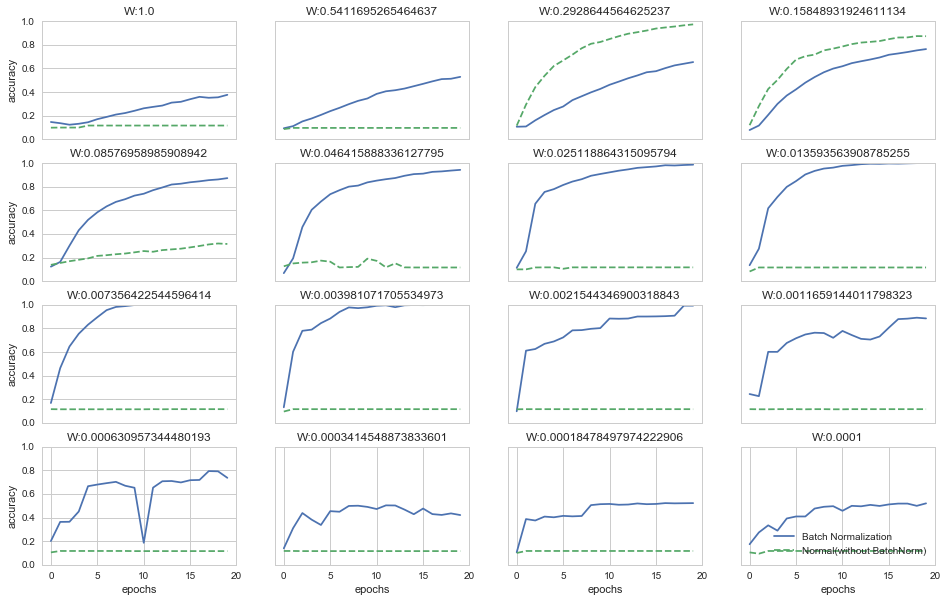

In [39]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)


x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

plt.figure(figsize=(16,10)) 
for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

### 6.4.1 오버피팅

In [41]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
x_train = x_train[:300]
t_train = t_train[:300]

In [43]:
network = MultiLayerNet(input_size=784, hidden_size_list=[100,100,100,100,100,100], output_size=10)
optimizer = SGD(lr=0.01)
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list=[]
train_acc_list=[]
test_acc_list=[]

iter_per_epoch = max(train_size/batch_size,1)
epoch_cnt=0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)
    
    if i%iter_per_epoch == 0:
        train_acc = network.accuracy(x_train,t_train)
        test_Acc = network.accuracy(x_test,t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_Acc)
        
        epoch_cnt+=1
        if epoch_cnt >=  max_epochs:
            break

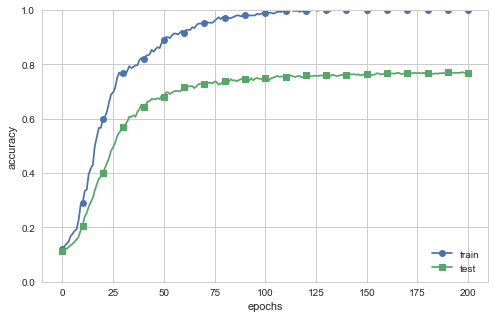

In [55]:
plt.figure(figsize=(8,5)) 
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 6.4.3 드롭아웃

In [56]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
        
    def forward(self, x, train_flg = True):
        if train_flg:
            self.mask = np.random.rand(*x.shape)>self.dropout_ratio
            return x*self.mask
        else:
            return x*(1.0-self.dropout_ratio)
        
    def backward(self, dout):
        return dout*self.mask